In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

import numpy as np
import matplotlib.pyplot as plt
import quantities as pq
from operator import itemgetter
import matplotlib.ticker as mtick
from edog.tools import*
from edog.plot import*

filename = "params.yaml"
params = parse_parameters(filename)

nt, nr, dt, dr = itemgetter("nt", "nr", "dt", "dr")(params["grid"])
k_id, w_id, patch_diameter = itemgetter("k_id", "w_id", "patch_diameter")(params["stimulus"])
A_g, a_g, B_g, b_g = itemgetter("A", "a", "B", "b")(params["ganglion"])
w_rg, A_rg, a_rg = itemgetter("w", "A", "a")(params["relay"]["Krg"])
w_rig, A_rig, a_rig = itemgetter("w", "A", "a")(params["relay"]["Krig"])
w_rc_ex, A_rc_ex, a_rc_ex = itemgetter("w", "A", "a")(params["relay"]["Krc_ex"])
w_rc_in, A_rc_in, a_rc_in = itemgetter("w", "A", "a")(params["relay"]["Krc_in"])

w_rc_mix = itemgetter("w")(params["relay"]["Krc_mix"])
A_rc_mix_in, a_rc_mix_in = itemgetter("A", "a")(params["relay"]["Krc_mix"]["Krc_in"])
A_rc_mix_ex, a_rc_mix_ex = itemgetter("A", "a")(params["relay"]["Krc_mix"]["Krc_ex"])

size_tuning = {"fb_ex": {}, "fb_in": {}, "fb_mix": {}}

## Feedback excitation

In [2]:
tuning_curve = np.zeros([len(nr), len(dr), len(w_rc_ex), len(patch_diameter)])
cen_size = np.zeros([len(nr), len(dr), len(w_rc_ex)])
supp_index = np.zeros([len(nr), len(dr), len(w_rc_ex)])

for k, n in enumerate(nr):
    for j, d in enumerate(dr):
        print("nr={}, dr={}, dk={}, k_max={}".format(n, round(d, 2), 
                                                     round(2*np.pi/(2**n*d), 2), 
                                                     round(np.pi/d), 2))
        for i, w in enumerate(w_rc_ex):
            network = create_spatial_network(nt=nt, nr=n, dt=dt, dr=d,
                                     A_g=A_g, a_g=a_g, B_g=B_g, b_g=b_g,
                                     w_rg=w_rg, A_rg=A_rg, a_rg=a_rg,
                                     w_rig=w_rig, A_rig=A_rig, a_rig=a_rig,
                                     w_rc_ex=w, A_rc_ex=A_rc_ex, a_rc_ex=a_rc_ex)

            angular_freq = network.integrator.temporal_angular_freqs[int(w_id)]
            wavenumber = network.integrator.spatial_angular_freqs[int(k_id)]
            spatiotemporal_tuning = spatiotemporal_size_tuning(network=network,
                                                               angular_freq=angular_freq,
                                                               wavenumber=wavenumber,
                                                               patch_diameter=patch_diameter)

            tuning_curve[k, j, i, :] = spatiotemporal_tuning[0, :]

            cen_size[k, j, i] = rf_center_size(tuning_curve[k, j, i, :], patch_diameter)
            supp_index[k, j, i] = compute_suppression_index(tuning_curve[k, j, i, :])

size_tuning["fb_ex"] = {"tuning_curve": tuning_curve, "cen_size": cen_size, "supp_index": supp_index}

nr=5.0, dr=0.05 deg, dk=3.93 1/deg, k_max=63.0 1/deg
nr=5.0, dr=0.1 deg, dk=1.96 1/deg, k_max=31.0 1/deg
nr=5.0, dr=0.15 deg, dk=1.31 1/deg, k_max=21.0 1/deg
nr=5.0, dr=0.2 deg, dk=0.98 1/deg, k_max=16.0 1/deg
nr=6.0, dr=0.05 deg, dk=1.96 1/deg, k_max=63.0 1/deg
nr=6.0, dr=0.1 deg, dk=0.98 1/deg, k_max=31.0 1/deg
nr=6.0, dr=0.15 deg, dk=0.65 1/deg, k_max=21.0 1/deg
nr=6.0, dr=0.2 deg, dk=0.49 1/deg, k_max=16.0 1/deg
nr=7.0, dr=0.05 deg, dk=0.98 1/deg, k_max=63.0 1/deg
nr=7.0, dr=0.1 deg, dk=0.49 1/deg, k_max=31.0 1/deg
nr=7.0, dr=0.15 deg, dk=0.33 1/deg, k_max=21.0 1/deg
nr=7.0, dr=0.2 deg, dk=0.25 1/deg, k_max=16.0 1/deg
nr=8.0, dr=0.05 deg, dk=0.49 1/deg, k_max=63.0 1/deg
nr=8.0, dr=0.1 deg, dk=0.25 1/deg, k_max=31.0 1/deg
nr=8.0, dr=0.15 deg, dk=0.16 1/deg, k_max=21.0 1/deg
nr=8.0, dr=0.2 deg, dk=0.12 1/deg, k_max=16.0 1/deg
nr=9.0, dr=0.05 deg, dk=0.25 1/deg, k_max=63.0 1/deg
nr=9.0, dr=0.1 deg, dk=0.12 1/deg, k_max=31.0 1/deg
nr=9.0, dr=0.15 deg, dk=0.08 1/deg, k_max=21.0 1/deg
nr

## Feedback inhibition

In [3]:
tuning_curve = np.zeros([len(nr), len(dr), len(w_rc_in), len(patch_diameter)])
cen_size = np.zeros([len(nr), len(dr), len(w_rc_in)])
supp_index = np.zeros([len(nr), len(dr), len(w_rc_in)])

for k, n in enumerate(nr):
    for j, d in enumerate(dr):
        print("nr={}, dr={}, dk={}, k_max={}".format(n, round(d, 2), 
                                                     round(2*np.pi/(2**n*d), 2), 
                                                     round(np.pi/d), 2))
        for i, w in enumerate(w_rc_in):
            network = create_spatial_network(nt=nt, nr=n, dt=dt, dr=d,
                                     A_g=A_g, a_g=a_g, B_g=B_g, b_g=b_g,
                                     w_rg=w_rg, A_rg=A_rg, a_rg=a_rg,
                                     w_rig=w_rig, A_rig=A_rig, a_rig=a_rig,
                                     w_rc_in=w, A_rc_in=A_rc_in, a_rc_in=a_rc_in)

            angular_freq = network.integrator.temporal_angular_freqs[int(w_id)]
            wavenumber = network.integrator.spatial_angular_freqs[int(k_id)]
            spatiotemporal_tuning = spatiotemporal_size_tuning(network=network,
                                                               angular_freq=angular_freq,
                                                               wavenumber=wavenumber,
                                                               patch_diameter=patch_diameter)

            tuning_curve[k, j, i, :] = spatiotemporal_tuning[0, :]

            cen_size[k, j, i] = rf_center_size(tuning_curve[k, j, i, :], patch_diameter)
            supp_index[k, j, i] = compute_suppression_index(tuning_curve[k, j, i, :])

size_tuning["fb_in"] = {"tuning_curve": tuning_curve, "cen_size": cen_size, "supp_index": supp_index}

nr=5.0, dr=0.05 deg, dk=3.93 1/deg, k_max=63.0 1/deg
nr=5.0, dr=0.1 deg, dk=1.96 1/deg, k_max=31.0 1/deg
nr=5.0, dr=0.15 deg, dk=1.31 1/deg, k_max=21.0 1/deg
nr=5.0, dr=0.2 deg, dk=0.98 1/deg, k_max=16.0 1/deg
nr=6.0, dr=0.05 deg, dk=1.96 1/deg, k_max=63.0 1/deg
nr=6.0, dr=0.1 deg, dk=0.98 1/deg, k_max=31.0 1/deg
nr=6.0, dr=0.15 deg, dk=0.65 1/deg, k_max=21.0 1/deg
nr=6.0, dr=0.2 deg, dk=0.49 1/deg, k_max=16.0 1/deg
nr=7.0, dr=0.05 deg, dk=0.98 1/deg, k_max=63.0 1/deg
nr=7.0, dr=0.1 deg, dk=0.49 1/deg, k_max=31.0 1/deg
nr=7.0, dr=0.15 deg, dk=0.33 1/deg, k_max=21.0 1/deg
nr=7.0, dr=0.2 deg, dk=0.25 1/deg, k_max=16.0 1/deg
nr=8.0, dr=0.05 deg, dk=0.49 1/deg, k_max=63.0 1/deg
nr=8.0, dr=0.1 deg, dk=0.25 1/deg, k_max=31.0 1/deg
nr=8.0, dr=0.15 deg, dk=0.16 1/deg, k_max=21.0 1/deg
nr=8.0, dr=0.2 deg, dk=0.12 1/deg, k_max=16.0 1/deg
nr=9.0, dr=0.05 deg, dk=0.25 1/deg, k_max=63.0 1/deg
nr=9.0, dr=0.1 deg, dk=0.12 1/deg, k_max=31.0 1/deg
nr=9.0, dr=0.15 deg, dk=0.08 1/deg, k_max=21.0 1/deg
nr

## Mixed excitatory and inhibitory feedback

In [4]:
tuning_curve = np.zeros([len(nr), len(dr), len(w_rc_mix), len(patch_diameter)])
cen_size = np.zeros([len(nr), len(dr), len(w_rc_mix)])
supp_index = np.zeros([len(nr), len(dr), len(w_rc_mix)])


for k, n in enumerate(nr):
    for j, d in enumerate(dr):
        print("nr={}, dr={}, dk={}, k_max={}".format(n, round(d, 2), 
                                                     round(2*np.pi/(2**n*d), 2), 
                                                     round(np.pi/d), 2))
        for i, w in enumerate(w_rc_mix):
            network = create_spatial_network(nt=nt, nr=n, dt=dt, dr=d,
                                     A_g=A_g, a_g=a_g, B_g=B_g, b_g=b_g,
                                     w_rg=w_rg, A_rg=A_rg, a_rg=a_rg,
                                     w_rig=w_rig, A_rig=A_rig, a_rig=a_rig,
                                     w_rc_in=w, A_rc_in=A_rc_mix_in, a_rc_in=a_rc_mix_in,
                                     w_rc_ex=w, A_rc_ex=A_rc_mix_ex, a_rc_ex=a_rc_mix_ex)

            angular_freq = network.integrator.temporal_angular_freqs[int(w_id)]
            wavenumber = network.integrator.spatial_angular_freqs[int(k_id)]
            spatiotemporal_tuning = spatiotemporal_size_tuning(network=network,
                                                               angular_freq=angular_freq,
                                                               wavenumber=wavenumber,
                                                               patch_diameter=patch_diameter)

            tuning_curve[k, j, i, :] = spatiotemporal_tuning[0, :]

            cen_size[k, j, i] = rf_center_size(tuning_curve[k, j, i, :], patch_diameter)
            supp_index[k, j, i] = compute_suppression_index(tuning_curve[k, j, i, :])


size_tuning["fb_mix"] = {"tuning_curve": tuning_curve, "cen_size": cen_size, "supp_index": supp_index}

nr=5.0, dr=0.05 deg, dk=3.93 1/deg, k_max=63.0 1/deg
nr=5.0, dr=0.1 deg, dk=1.96 1/deg, k_max=31.0 1/deg
nr=5.0, dr=0.15 deg, dk=1.31 1/deg, k_max=21.0 1/deg
nr=5.0, dr=0.2 deg, dk=0.98 1/deg, k_max=16.0 1/deg
nr=6.0, dr=0.05 deg, dk=1.96 1/deg, k_max=63.0 1/deg
nr=6.0, dr=0.1 deg, dk=0.98 1/deg, k_max=31.0 1/deg
nr=6.0, dr=0.15 deg, dk=0.65 1/deg, k_max=21.0 1/deg
nr=6.0, dr=0.2 deg, dk=0.49 1/deg, k_max=16.0 1/deg
nr=7.0, dr=0.05 deg, dk=0.98 1/deg, k_max=63.0 1/deg
nr=7.0, dr=0.1 deg, dk=0.49 1/deg, k_max=31.0 1/deg
nr=7.0, dr=0.15 deg, dk=0.33 1/deg, k_max=21.0 1/deg
nr=7.0, dr=0.2 deg, dk=0.25 1/deg, k_max=16.0 1/deg
nr=8.0, dr=0.05 deg, dk=0.49 1/deg, k_max=63.0 1/deg
nr=8.0, dr=0.1 deg, dk=0.25 1/deg, k_max=31.0 1/deg
nr=8.0, dr=0.15 deg, dk=0.16 1/deg, k_max=21.0 1/deg
nr=8.0, dr=0.2 deg, dk=0.12 1/deg, k_max=16.0 1/deg
nr=9.0, dr=0.05 deg, dk=0.25 1/deg, k_max=63.0 1/deg
nr=9.0, dr=0.1 deg, dk=0.12 1/deg, k_max=31.0 1/deg
nr=9.0, dr=0.15 deg, dk=0.08 1/deg, k_max=21.0 1/deg
nr

-------------
## Convergence plots

<IPython.core.display.Javascript object>


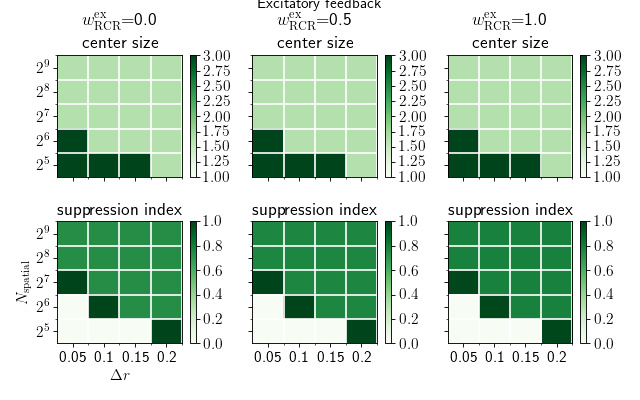

<IPython.core.display.Javascript object>


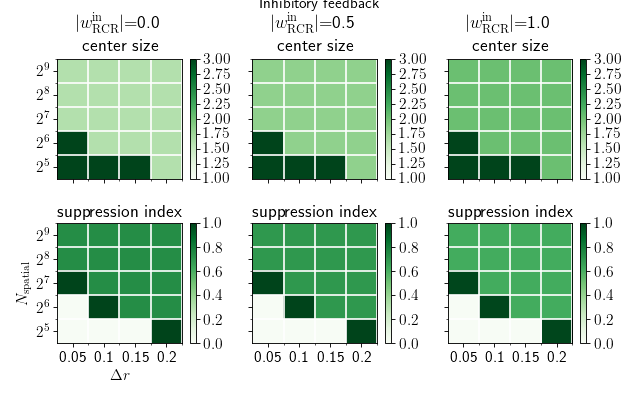

<IPython.core.display.Javascript object>


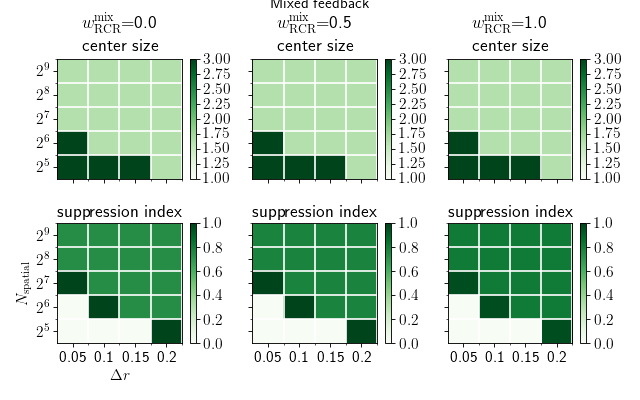

In [15]:
vmin_cs = 1
vmax_cs = 3
vmin_supp = 0.0
vmax_supp = 1
extent = [dr.min(), dr.max(), nr.min(), nr.max()]
locs_dr = np.arange(0.0, len(dr))
locs_nr = np.arange(0.0, len(nr))
cmap = "Greens"

titles = ["Excitatory feedback", 
          "Inhibitory feedback", 
          "Mixed feedback"]

labels = [r"$w^\mathrm{ex}_{\mathrm{RCR}}$", 
          r"$|w^\mathrm{in}_{\mathrm{RCR}}|$", 
          r"$w^\mathrm{mix}_{\mathrm{RCR}}$"]



# Size tuning curves:
for i, (key, w_rc) in enumerate(zip(size_tuning.keys(), [w_rc_ex, w_rc_in, w_rc_mix])):
    fig, ax = plt.subplots(2, 3, figsize=(8, 5), sharex="col", sharey="row")
    plt.figtext(0.5, 0.99, titles[i], va="center", ha="center")
    
    for j, w in enumerate(w_rc):
        ax[0, j].set_title(labels[i]+"={} \n center size".format(w))
        cax = ax[0, j].imshow(size_tuning[key]["cen_size"][:, :, j], 
                        aspect="auto", origin="lower", cmap=cmap, vmin=vmin_cs, vmax=vmax_cs)
        fig.colorbar(cax, ax=ax[0, j])
        
        ax[1, j].set_title("suppression index")
        cax = ax[1, j].imshow(size_tuning[key]["supp_index"][:, :, j], 
                        aspect="auto", origin="lower", cmap=cmap, vmin=vmin_supp, vmax=vmax_supp)
        fig.colorbar(cax, ax=ax[1, j])
        
        for ax1, ax2 in zip([ax[0, j].xaxis, ax[1, j].xaxis], 
                            [ax[0, j].yaxis, ax[1, j].yaxis]):
            ax1.set_ticks(locs_dr + 0.5, minor=True)
            ax1.set(ticks=locs_dr, ticklabels=dr.magnitude)
            
            ax2.set_ticks(locs_nr + 0.5, minor=True)
            ax2.set(ticks=locs_nr, ticklabels=[r"$2^{}$".format(int(n)) for n in nr])
        
        ax[0, j].grid(which='minor', color='w', linestyle='-', linewidth=1.5)
        ax[1, j].grid(which='minor', color='w', linestyle='-', linewidth=1.5)
        

    ax[1, 0].set_ylabel(r"$N_\mathrm{spatial}$")
    ax[1, 0].set_xlabel(r"$\Delta r$")  

    fig.tight_layout()
